# Ironhack Project NLP

Team 4 (Salva, Diego, Fabi)

## Imports

Import only needed libaries

In [280]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix, f1_score
from IPython.display import Markdown, display

%matplotlib inline

## Preparations

### Constants

Make classes readable

In [281]:
CLASSES = {"0": "Fake news", "1": "Real news"}

### Functions

#### Pre Processing

Helper methods to clean up the texts

In [282]:
def clean_text(text):
    """
    Remove numbers and extra spaces from text

    Args:
        text(string): The text to be cleaned.

    Returns:
        string: The cleaned text.
    """

    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # replace multiple spaces with just 1
    return text

#### Evaluating

Helper Methods to evaluate the result of the trained model

In [283]:
def accuracy(y_test, y_pred):
    """
    Calculate and print the accuracy score.

    Args:
        y_test(pandas.core.series.Series): The true labels.
        y_pred(numpy.ndarray): The predicted labels.

    Returns:
        None. Prints the accuracy score.
    """

    display(Markdown('**Accuracy**'))

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{accuracy:.4}")

In [284]:
def f1(y_test, y_pred):
    """
    Calculate and print the accuracy score.

    Args:
        y_test(pandas.core.series.Series): The true labels.
        y_pred(numpy.ndarray): The predicted labels.

    Returns:
        None. Prints the f1 score.
    """

    display(Markdown('**F1-Score**'))

    f1_score_per_class = f1_score(y_test, y_pred)
    print(f"{f1_score_per_class:.4}")

In [285]:
def classification(y_test, y_pred):
    """
    Generate and display the classification report.

    Args:
        y_test(pandas.core.series.Series): The true labels.
        y_pred(numpy.ndarray): The predicted labels.

    Returns:
        None. Displays the classification report.
    """

    display(Markdown('**Classification Report**'))

    report = classification_report(y_test, y_pred, output_dict=True, target_names=[CLASSES['0'], CLASSES['1']])
    df = pd.DataFrame(report).transpose()
    df = df.map(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)
    display(df)

In [286]:
def confus_matrix(y_test, y_pred):
    """
    Generate and display the confusion matrix.

    Args:
        y_test(pandas.core.series.Series): The true labels.
        y_pred(numpy.ndarray): The predicted labels.

    Returns:
        None. Displays the confusion matrix.
    """

    display(Markdown('**Confusion Matrix**'))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[CLASSES['0'], CLASSES['1']])
    disp.plot(cmap='Greens')
    disp.ax_.set(xlabel='Predicted Values', ylabel='Actual Values')
    plt.show()


### Import Data

Loads the labeled text data from a tab-separated file named "training_data_lowercase.csv" into a Pandas DataFrame.

In [287]:
data = pd.read_csv('training_data_lowercase.csv', sep='\t', header=None, names=['class', 'text'])

### Pre Process Data

Apply a text cleanup

In [288]:
data['text'] = data['text'].apply(clean_text)

## Model

Using a LogisticRegression with TF-IDF vectorized text data, the model is trained to classify text as "Machine translated" or "Professional translated".

In [289]:
model = LogisticRegression(solver='liblinear')
vectorized = TfidfVectorizer(max_features=3200).fit_transform(data['text'])

X_train, X_test, y_train, y_test = train_test_split(vectorized, data['class'], test_size=0.3, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Evaluation

The trained model is then evaluated using metrics like cross validation score, accuracy and F1-score, along with a confusion matrix and classification report.

**Cross Validation Score**

0.9152



**Accuracy**

0.9413



**F1-Score**

0.94



**Confusion Matrix**

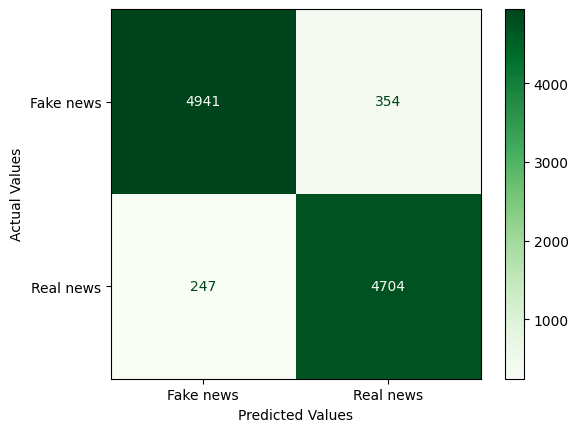

**Classification Report**

,precision,recall,f1-score,support
Fake news,0.95,0.93,0.94,5295.00
Real news,0.93,0.95,0.94,4951.00
accuracy,0.94,0.94,0.94,0.94
macro avg,0.94,0.94,0.94,10246.00
weighted avg,0.94,0.94,0.94,10246.00


In [290]:
display(Markdown('**Cross Validation Score**'))
print(round(np.mean(cross_val_score(model, vectorized, data['class'], cv=5)), 4))
print("")

accuracy(y_test, y_pred)
print("")

f1(y_test, y_pred)
print("")

confus_matrix(y_test, y_pred)
print("")

classification(y_test, y_pred)